In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
os. getcwd()

'/Users/maslylabmacbook/Desktop/tf'

In [3]:
data_dir=(os. getcwd()+"/class")
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpeg')))
print(image_count)

3300


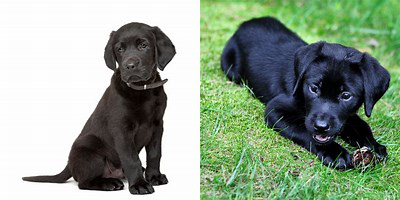

In [5]:
from random import randint
dog = list(data_dir.glob('dog/*'))
num=randint(0,len(dog))
PIL.Image.open(str(dog[num]))

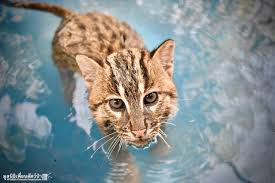

In [6]:
cat = list(data_dir.glob('cat/*'))
num=randint(0,len(cat))
PIL.Image.open(str(cat[num]))

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=100,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3300 files belonging to 5 classes.
Using 2640 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=100,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3300 files belonging to 5 classes.
Using 660 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog', 'Hotdog', 'Lizard', 'Salamander']


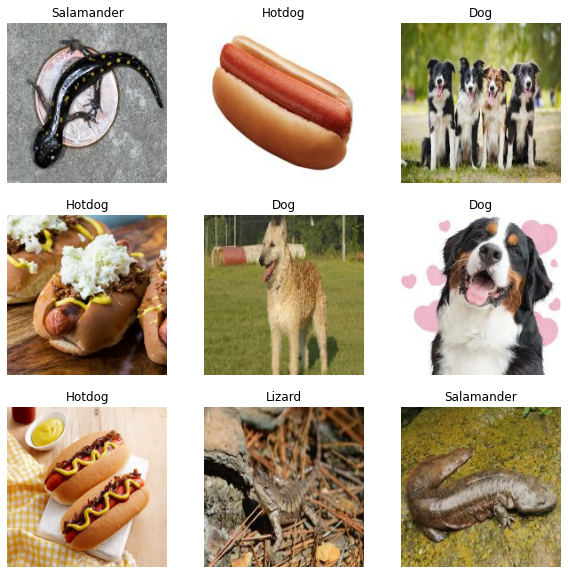

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
83/83 [==============================] - 33s 393ms/step - loss: 1.8596 - accuracy: 0.2720 - val_loss: 1.2688 - val_accuracy: 0.4318
Epoch 2/10
83/83 [==============================] - 34s 408ms/step - loss: 1.2583 - accuracy: 0.4740 - val_loss: 1.2253 - val_accuracy: 0.5136
Epoch 3/10
83/83 [==============================] - 34s 410ms/step - loss: 1.1228 - accuracy: 0.5490 - val_loss: 1.1046 - val_accuracy: 0.5394
Epoch 4/10
83/83 [==============================] - 33s 398ms/step - loss: 0.9063 - accuracy: 0.6421 - val_loss: 1.0610 - val_accuracy: 0.5818
Epoch 5/10
83/83 [==============================] - 33s 399ms/step - loss: 0.7398 - accuracy: 0.7065 - val_loss: 1.1426 - val_accuracy: 0.5848
Epoch 6/10
83/83 [==============================] - 34s 408ms/step - loss: 0.5766 - accuracy: 0.7896 - val_loss: 1.3637 - val_accuracy: 0.5424
Epoch 7/10
83/83 [==============================] - 34s 402ms/step - loss: 0.3794 - accuracy: 0.8687 - val_loss: 1.5907 - val_accuracy: 0.5697

This image most likely belongs to Salamander with a 99.74 percent confidence.


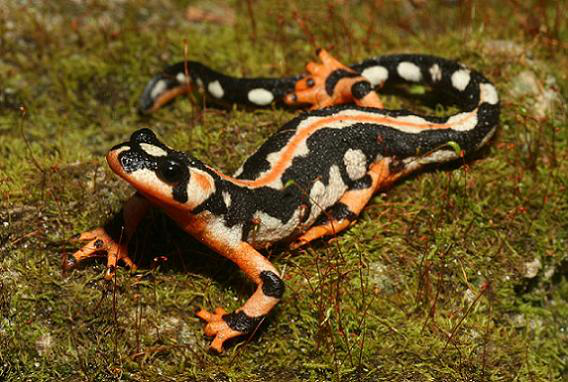

In [18]:
s=(os. getcwd()+"/sam.jpeg")
s=pathlib.Path(s)

img = keras.preprocessing.image.load_img(
    s, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
PIL.Image.open(str(s))

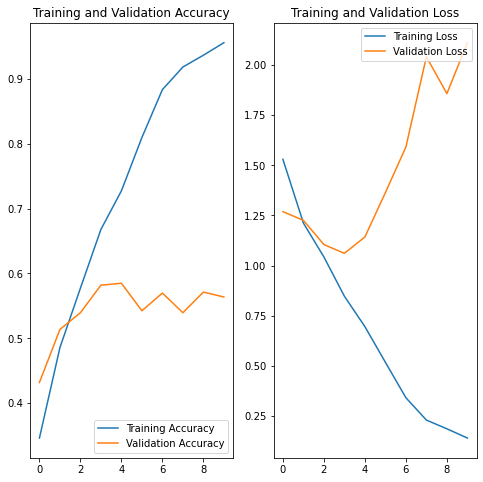

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()